# Báo cáo về Mô hình K-Nearest Neighbors (KNN) Phát hiện Mã độc

## 1. Giới thiệu
Mã độc là phần mềm độc hại được thiết kế để gây hại hoặc xâm nhập vào các hệ thống máy tính mà không được phép. Việc phát hiện mã độc kịp thời là rất quan trọng để bảo vệ dữ liệu và hệ thống. Trong báo cáo này, chúng tôi sẽ xây dựng một mô hình K-Nearest Neighbors (KNN) để phát hiện mã độc từ một tập dữ liệu có sẵn. Mô hình sẽ được xây dựng từ đầu mà không sử dụng các hàm có sẵn từ thư viện, nhằm giúp người đọc hiểu rõ hơn về cách thức hoạt động của KNN.

## 2. Tải và Khám Phá Dữ Liệu


### 2.1. Tải dữ liệu
Chúng tôi bắt đầu bằng việc tải dữ liệu từ file CSV sử dụng thư viện pandas.

In [16]:
import pandas as pd

# Tải dữ liệu từ file CSV
data = pd.read_csv('TUANDROMD.csv')


### 2.2. Khám phá dữ liệu
Sau khi tải dữ liệu, chúng tôi sẽ khám phá dữ liệu để hiểu rõ cấu trúc của nó. Các phương pháp sử dụng bao gồm hiển thị các dòng đầu tiên, thống kê mô tả, kiểm tra dữ liệu bị thiếu và đếm số lượng các nhãn trong cột 'Label'.

In [17]:
# Khám phá dữ liệu
print(data.head())  # Hiển thị 5 dòng đầu tiên
print(data.describe())  # Thống kê mô tả các đặc trưng số
print(data.isnull().sum())  # Kiểm tra dữ liệu bị thiếu
print(data['Label'].value_counts())  # Đếm số lượng các nhãn trong cột 'Label'


   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0   

### Kết quả khám phá:

-   head(): Giúp nắm bắt được các đặc trưng của dữ liệu.
-   describe(): Cung cấp thông tin về giá trị tối thiểu, tối đa, trung bình, v.v., của các đặc trưng số.
-   isnull().sum(): Cho phép kiểm tra xem có giá trị nào bị thiếu hay không, giúp xác định xem cần phải xử lý các giá trị thiếu trước khi huấn luyện mô hình.
-   value_counts(): Thống kê số lượng các nhãn khác nhau trong cột 'Label', từ đó giúp chúng ta hiểu rõ phân bố nhãn trong tập dữ liệu.

## 3. Tiền Xử Lý Dữ Liệu

### 3.1. Chia dữ liệu
Sau khi khám phá dữ liệu, chúng tôi tiến hành chia dữ liệu thành các biến đặc trưng (X) và nhãn (y). Biến đặc trưng bao gồm tất cả các cột ngoại trừ cột 'Label', trong khi 'Label' sẽ là nhãn để phân loại.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành X (các đặc điểm) và y (nhãn)
X = data.drop('Label', axis=1).values  # Loại bỏ cột 'Label' để lấy đặc trưng
y = data['Label'].values  # Lấy cột 'Label' làm nhãn


### 3.2. Chia tập huấn luyện và tập kiểm tra
Chúng tôi sẽ chia dữ liệu thành hai phần: tập huấn luyện (80%) và tập kiểm tra (20%). Tập huấn luyện sẽ được sử dụng để huấn luyện mô hình, trong khi tập kiểm tra sẽ dùng để đánh giá hiệu suất của mô hình.

In [19]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Xây Dựng Mô Hình KNN
Chúng tôi sẽ xây dựng một lớp KNN từ đầu. Mô hình KNN sẽ dựa trên ý tưởng rằng các điểm dữ liệu gần nhau trong không gian đặc trưng có xu hướng có cùng nhãn.

In [20]:
class KNN:
    def __init__(self, k=3):
        self.k = k  # Số lượng láng giềng gần nhất

    def fit(self, X, y):
        self.X_train = X  # Lưu tập huấn luyện
        self.y_train = y  # Lưu nhãn huấn luyện

    def predict(self, X):
        predictions = [self._predict(sample) for sample in X]  # Dự đoán cho từng mẫu
        return np.array(predictions)

    def _predict(self, sample):
        # Tính toán khoảng cách Euclidean giữa mẫu và tất cả các điểm trong tập huấn luyện
        distances = np.linalg.norm(self.X_train - sample, axis=1)
        k_indices = np.argsort(distances)[:self.k]  # Lấy chỉ số của k láng giềng gần nhất
        k_nearest_labels = [self.y_train[i] for i in k_indices]  # Lấy nhãn của k láng giềng
        most_common = np.bincount(k_nearest_labels).argmax()  # Trả về nhãn phổ biến nhất
        return most_common


### Giải thích từng thành phần trong lớp KNN:
- __init__: Khởi tạo mô hình với tham số k, số lượng láng giềng gần nhất để xem xét.
- fit: Lưu trữ tập huấn luyện và nhãn tương ứng để sử dụng trong quá trình dự đoán.
- predict: Dự đoán nhãn cho mỗi mẫu trong tập kiểm tra.
- _predict: Tính toán khoảng cách Euclidean giữa mẫu cần dự đoán và tất cả các mẫu trong tập huấn luyện, xác định nhãn phổ biến nhất từ k láng giềng gần nhất.

## 5. Huấn Luyện Mô Hình
Chúng tôi sẽ khởi tạo mô hình KNN và huấn luyện nó bằng cách gọi hàm fit.

In [21]:
# Khởi tạo mô hình KNN
k = 5  # Số lượng láng giềng gần nhất
knn_model = KNN(k=k)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)


### Giải thích:

Mô hình KNN được khởi tạo với số lượng láng giềng gần nhất là 5 và sau đó được huấn luyện trên tập dữ liệu huấn luyện.

## 6. Dự Đoán và Đánh Giá Độ Chính Xác
Sau khi huấn luyện mô hình, chúng tôi sẽ sử dụng nó để dự đoán các nhãn cho tập kiểm tra và tính toán độ chính xác.

In [22]:
# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

# Tính toán độ chính xác
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.22%


### Giải thích:

Mô hình sẽ dự đoán nhãn cho tập kiểm tra và so sánh với nhãn thực tế để tính toán độ chính xác của mô hình.

## 7. Phân Tích Kết Quả
Chúng tôi sẽ sử dụng ma trận nhầm lẫn để phân tích các dự đoán, giúp hiểu rõ hơn về hiệu suất của mô hình.

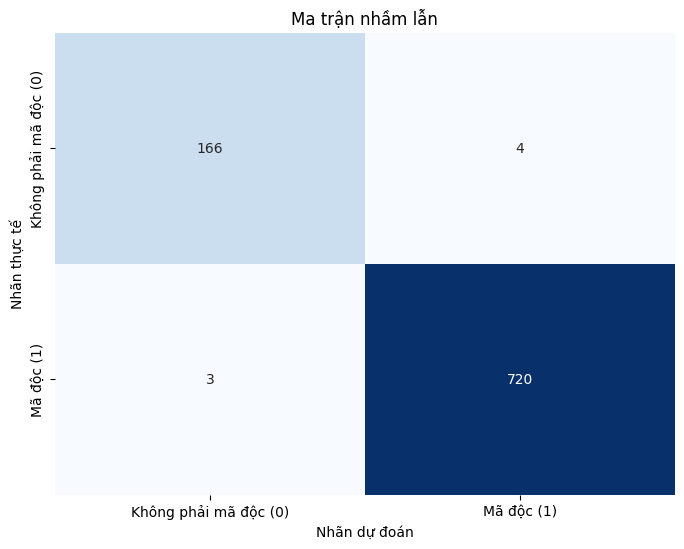

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Không phải mã độc (0)', 'Mã độc (1)'],
            yticklabels=['Không phải mã độc (0)', 'Mã độc (1)'])
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.show()


### Giải thích:
- confusion_matrix: Tính toán ma trận nhầm lẫn giữa nhãn thực tế và nhãn dự đoán.
- seaborn heatmap: Vẽ biểu đồ nhiệt để trực quan hóa ma trận nhầm lẫn, giúp dễ dàng nhận thấy số lượng đúng và sai của các dự đoán.

## 8. Kết Luận
Quá trình xây dựng mô hình K-Nearest Neighbors để phát hiện mã độc từ tập dữ liệu CSV bao gồm các bước từ tải và khám phá dữ liệu, tiền xử lý, xây dựng mô hình, huấn luyện, dự đoán và phân tích kết quả. Mô hình KNN cho thấy một độ chính xác cao trong việc phân loại mã độc so với không phải mã độc.